# Jelaskan perbedaan hasil dari Preprocessing menggunakan NLTK, TextBlob dan Sastrawi dan berikan contohnya

In [14]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download resource NLTK yang dibutuhkan
nltk.download('stopwords')
nltk.download('punkt')

# Input teks
text = "Cristiano Ronaldo was born on February 5, 1985, in Funchal, Madeira, Portugal."

# Tokenisasi dan normalisasi teks
tokens = word_tokenize(text.lower())

# Hapus stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

# Stemming dengan PorterStemmer
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

print(stemmed_tokens)


['cristiano', 'ronaldo', 'born', 'februari', '5', '1985', 'funchal', 'madeira', 'portug']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
from textblob import TextBlob

# Input teks
text = "Cristiano Ronaldo was born on February 5, 1985, in Funchal, Madeira, Portugal."

# Buat TextBlob dan lakukan tokenisasi serta stemming (lemmatization)
blob = TextBlob(text.lower())
lemmatized_tokens = [word.lemmatize() for word in blob.words]

print(lemmatized_tokens)


['cristiano', 'ronaldo', 'wa', 'born', 'on', 'february', '5', '1985', 'in', 'funchal', 'madeira', 'portugal']


In [16]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Buat stemmer Bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Input teks dalam Bahasa Indonesia
text = "Cristiano Ronaldo dilahirkan pada tanggal 5 Februari 1985 di Funchal, Madeira, Portugal."

# Stemming teks
stemmed_text = stemmer.stem(text.lower())

print(stemmed_text)


cristiano ronaldo lahir pada tanggal 5 februari 1985 di funchal madeira portugal


# Import Wikipedia

In [4]:
import wikipedia

# Set bahasa ke Indonesia
wikipedia.set_lang("id")

# Mengambil keywords stasiun televisi

In [5]:
# Daftar stasiun televisi
stations = ["TVRI", "RCTI", "Kompas_TV", "Indosiar", "antv", "tvOne", "MetroTV", "Trans7", "Trans_TV", "NET."]

# Mengambil Konten

In [6]:
# Loop melalui setiap stasiun televisi dan mengambil kontennya
for station in stations:
    try:
        page = wikipedia.page(station)
        print(f"Konten dari halaman Wikipedia {station}:\n")
        print(page.content[:500])  # Print hanya 500 karakter pertama untuk contoh
        print("\n" + "="*80 + "\n")
    except wikipedia.exceptions.DisambiguationError as e:
        print(f"Disambiguation Error untuk {station}: {e.options}")
    except wikipedia.exceptions.PageError:
        print(f"Halaman untuk {station} tidak ditemukan.")

Konten dari halaman Wikipedia TVRI:

Televisi Republik Indonesia (TVRI) adalah jaringan televisi publik berskala nasional di Indonesia. TVRI berstatus sebagai Lembaga Penyiaran Publik bersama Radio Republik Indonesia (RRI), yang ditetapkan melalui Undang-Undang No. 32/2002 tentang Penyiaran. TVRI merupakan jaringan televisi pertama di Indonesia, mulai mengudara pada tanggal 24 Agustus 1962 dan diperingati sebagai Hari Televisi Nasional. TVRI memonopoli siaran televisi di Indonesia hingga tahun 1989, ketika televisi swasta pertama I


Konten dari halaman Wikipedia RCTI:

RCTI  (singkatan dari Rajawali Citra Televisi Indonesia) adalah salah satu jaringan televisi swasta di Indonesia yang dimiliki oleh Media Nusantara Citra (MNC). RCTI merupakan televisi swasta pertama di Indonesia.
Didirikan awalnya sebagai perusahaan patungan antara Bimantara Citra dan Rajawali Wira Bhakti Utama, RCTI pertama mengudara pada 13 November 1988 dan diresmikan 24 Agustus 1989 pukul 13.30 WIB. Saat itu, siara

# Preprocessing

In [13]:
import nltk
import string
from nltk.corpus import stopwords

# Menggunakan stopwords bahasa Indonesia dari nltk
stop_words = set(stopwords.words('indonesian'))

# Preprocessing Function
def preprocess_text(text):
    # 1. Ubah teks menjadi huruf kecil
    text = text.lower()
    
    # 2. Hapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # 3. Tokenisasi teks
    tokens = nltk.word_tokenize(text)
    
    # 4. Hapus stopwords
    stop_words = set(stopwords.words('indonesian'))
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    
    # Gabungkan kembali token menjadi string
    return ' '.join(tokens)

# Mengambil konten dan preprocessing
documents = []
for station in stations:
    try:
        # Ambil halaman Wikipedia untuk stasiun
        page = wikipedia.page(station)
        content = page.content
        
        # Preprocessing konten
        preprocessed_content = preprocess_text(content)
        documents.append(preprocessed_content)
    
    except wikipedia.exceptions.DisambiguationError as e:
        print(f"Disambiguation Error untuk {station}: {e.options}")
    except wikipedia.exceptions.PageError:
        print(f"Halaman untuk {station} tidak ditemukan.")
    except Exception as e:
        print(f"Terjadi kesalahan untuk {station}: {e}")


# WordCloud

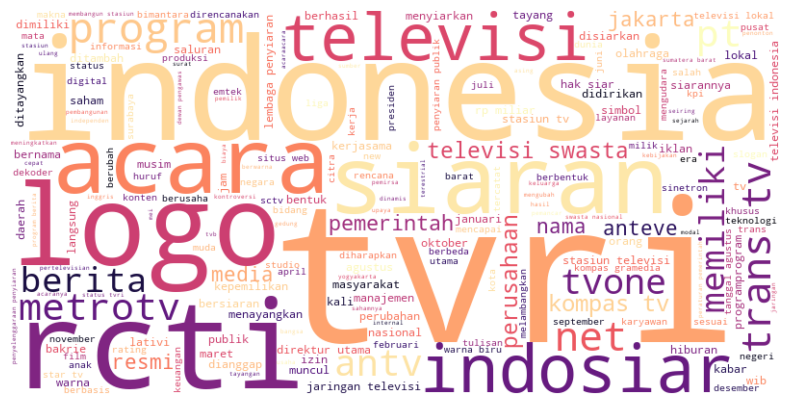

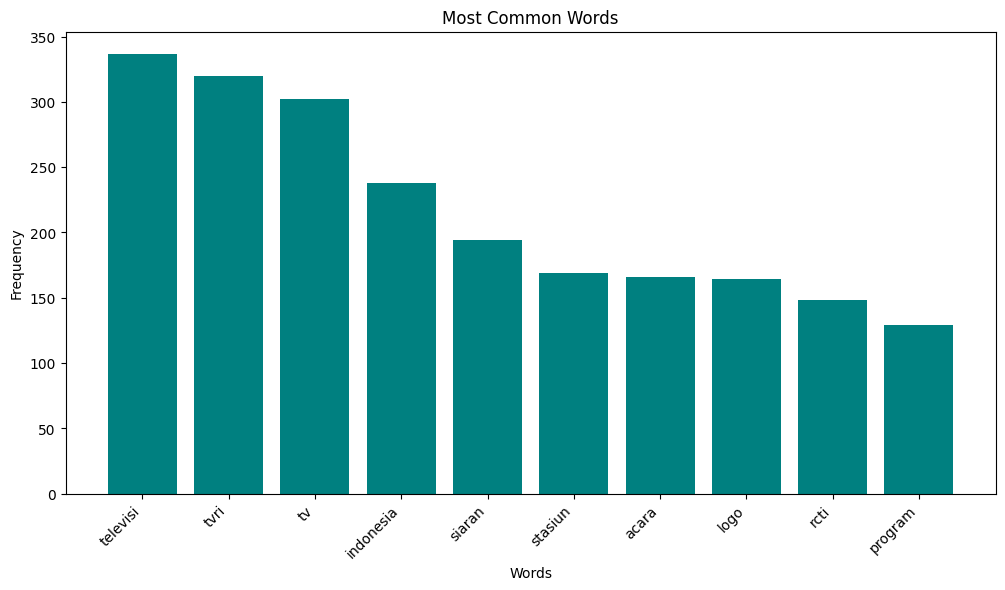

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter


# Gabungkan semua token hasil preprocessing menjadi satu string
all_text = ' '.join(documents)

# Tokenisasi untuk menghitung frekuensi kata
tokens = all_text.split()
word_freq = Counter(tokens)

# Ambil 10 kata yang paling umum
common_words = word_freq.most_common(10)
words, frequencies = zip(*common_words)

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(all_text)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Plot barplot untuk kata-kata yang paling umum
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies, color='teal')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words')
plt.xticks(rotation=45, ha='right')
plt.show()

Dari hasil wordCloud, didapatkan bahwa kata yang memiliki frekuensi paling besar adalah televisi, kemudian tvri dan tv.

# Clustering dengan Hierarchical Clustering

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

c:\Users\patri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


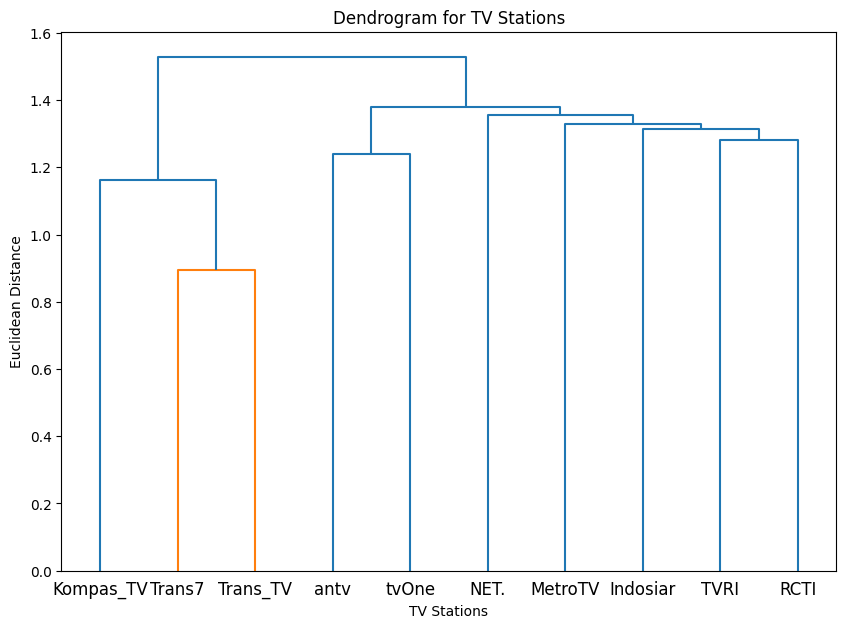

In [10]:
import nltk
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import wikipedia

# Menggunakan stopwords bahasa Indonesia dari nltk
stop_words = list(stopwords.words('indonesian'))  # Konversi ke list

# Preprocessing Function
def preprocess_text(text):
    # 1. Ubah teks menjadi huruf kecil
    text = text.lower()
    
    # 2. Hapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # 3. Tokenisasi teks
    tokens = nltk.word_tokenize(text)
    
    # 4. Hapus stopwords
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    
    # Gabungkan kembali token menjadi string
    return ' '.join(tokens)

# Mengambil konten dan preprocessing
stations = ["TVRI", "RCTI", "Kompas_TV", "Indosiar", "antv", "tvOne", "MetroTV", "Trans7", "Trans_TV", "NET."]
documents = []
for station in stations:
    try:
        # Ambil halaman Wikipedia untuk stasiun
        page = wikipedia.page(station)
        content = page.content
        
        # Preprocessing konten
        preprocessed_content = preprocess_text(content)
        documents.append(preprocessed_content)
    
    except wikipedia.exceptions.DisambiguationError as e:
        print(f"Disambiguation Error untuk {station}: {e.options}")
    except wikipedia.exceptions.PageError:
        print(f"Halaman untuk {station} tidak ditemukan.")
    except Exception as e:
        print(f"Terjadi kesalahan untuk {station}: {e}")

# Mengubah teks menjadi representasi TF-IDF dengan stopwords bahasa Indonesia
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(documents).toarray()

# Tentukan jumlah cluster yang valid (harus lebih dari 1 dan kurang dari jumlah dokumen)
n_clusters = min(max(2, len(documents) - 1), 5)  # Minimal 2 cluster dan maksimal 5

# Clustering menggunakan hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=n_clusters)
labels = clustering.fit_predict(X)

# Visualisasi dendrogram
Z = linkage(X, method='ward')  # Linkage menggunakan metode 'ward'
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=stations)
plt.title("Dendrogram for TV Stations")
plt.xlabel("TV Stations")
plt.ylabel("Euclidean Distance")
plt.show()


Interpretasi Dendrogram Stasiun TV

Didapatkan bahwa ada 3 cluster dari hasil clustering menggunakan Hierarchical Clustering.

Jarak Euclidean:  Jarak Euclidean yang lebih kecil menunjukkan kemiripan yang lebih besar antara dua stasiun TV. Berarti yang paling mirip adalah Trans7 dan Trans_TV

Cabang dan Gugus:  Trans7 dan Trans TV terlihat sangat dekat, menunjukkan kemiripan yang tinggi dalam berbagai aspek. Begitu pula dengan NET. dan MetroTV yang membentuk gugus terpisah.

Outlier: Stasiun TV Kompas TV terlihat cukup jauh dari gugus utama, mengindikasikan bahwa stasiun ini memiliki karakteristik yang cukup berbeda dibandingkan dengan stasiun TV lainnya.

# WordCloud dan Most Common Words per Cluster

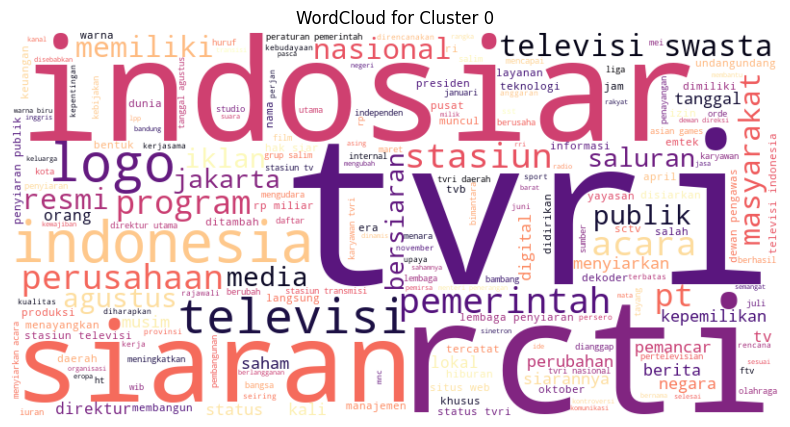

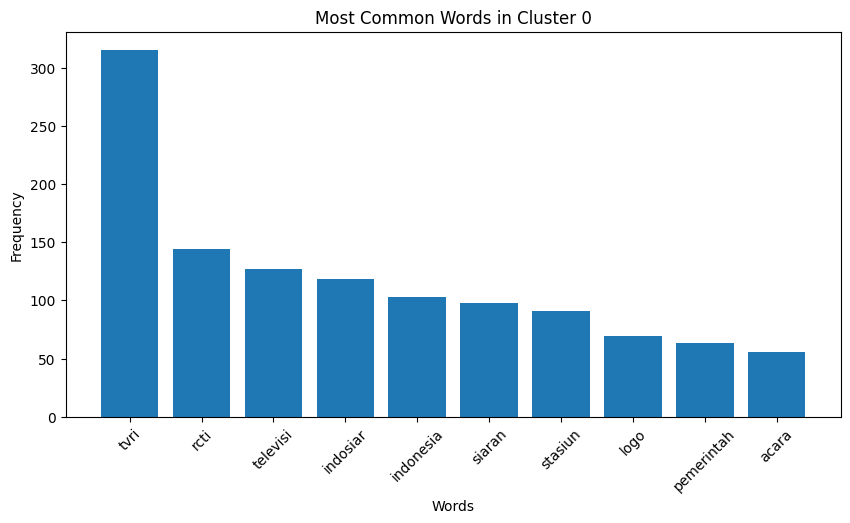

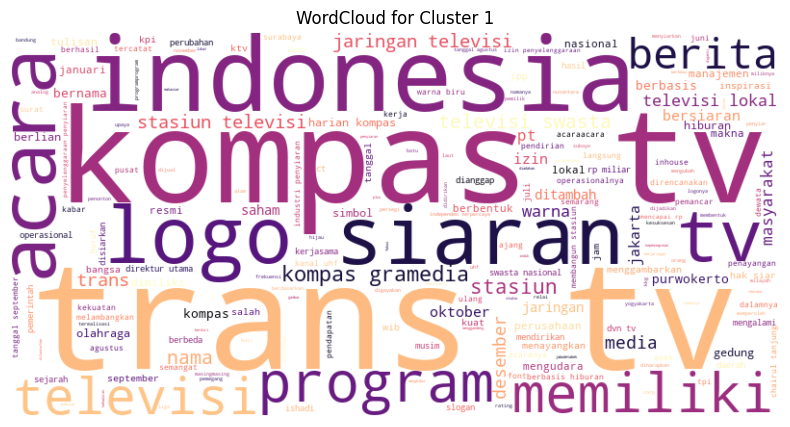

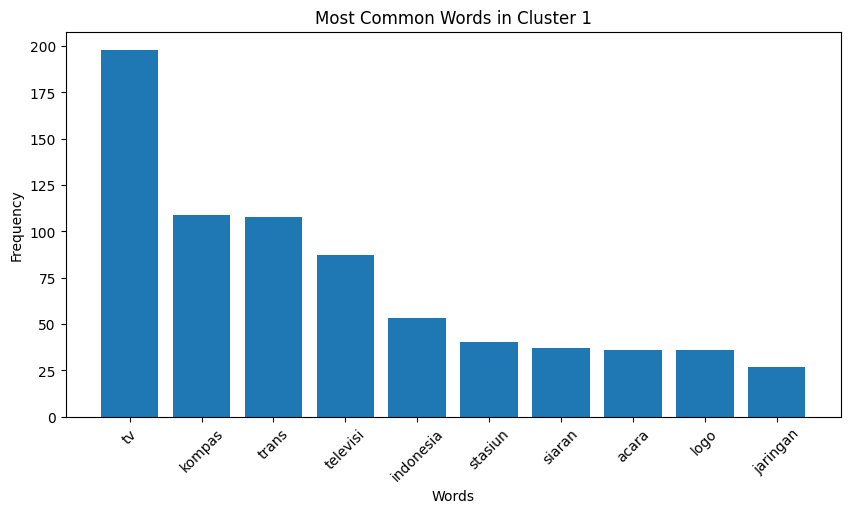

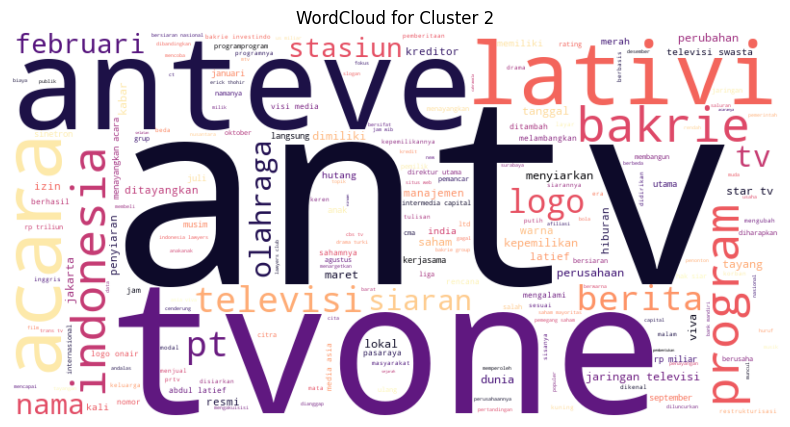

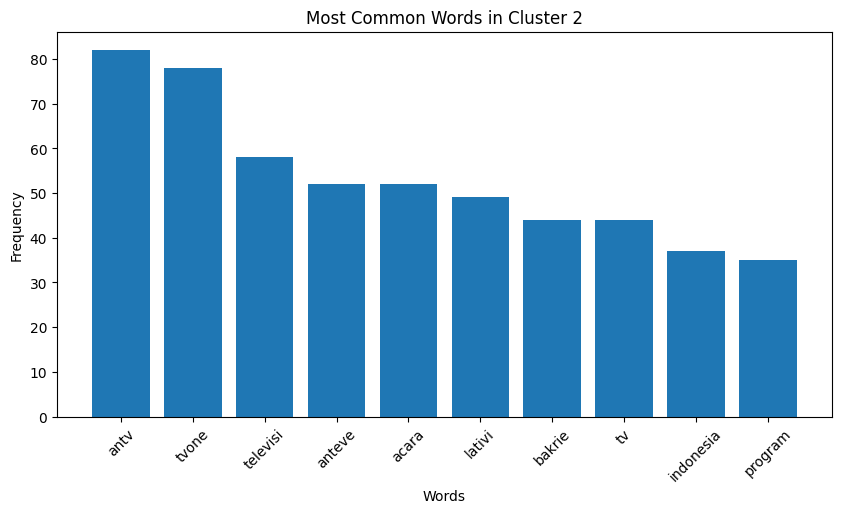

In [11]:
import numpy as np
import pandas as pd
# Buat DataFrame untuk menyimpan dokumen dengan label cluster
df = pd.DataFrame({'Document': documents, 'Cluster': labels})

# Tentukan jumlah cluster yang valid (harus lebih dari 1 dan kurang dari jumlah dokumen)
n_clusters = 3  # Misalnya, Anda ingin 3 cluster

# Buat WordCloud dan barplot untuk masing-masing cluster
for cluster_num in range(n_clusters):
    cluster_docs = df[df['Cluster'] == cluster_num]['Document']
    
    # Gabungkan semua token hasil preprocessing menjadi satu string
    all_text = ' '.join(cluster_docs)
    
    # Buat WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(all_text)
    
    # Plot WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for Cluster {cluster_num}')
    plt.show()
    
    # Tokenisasi dan hitung frekuensi kata
    tokens = nltk.word_tokenize(all_text.lower())
    tokens = [word for word in tokens if word.isalpha()]  # Hapus tanda baca
    freq_dist = Counter(tokens)
    
    # Buat barplot untuk kata-kata yang paling umum
    common_words = freq_dist.most_common(10)
    words, counts = zip(*common_words)
    
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.title(f'Most Common Words in Cluster {cluster_num}')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Silhouette Score

In [12]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

# Mengubah teks menjadi representasi TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents).toarray()

# Tentukan jumlah cluster yang valid
n_clusters = min(len(documents) - 1, 5)  # Misalnya, tentukan jumlah cluster maksimal 5 atau kurang dari jumlah dokumen

# Clustering menggunakan hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=n_clusters)
labels = clustering.fit_predict(X)  # Mendapatkan label cluster untuk setiap dokumen

# Hitung Silhouette Score
if n_clusters > 1:
    silhouette_avg = silhouette_score(X, labels)
    print(f"Skor Silhouette: {silhouette_avg:.3f}")
else:
    print("Jumlah cluster harus lebih dari 1 untuk menghitung Silhouette Score.")


Skor Silhouette: 0.061


Skor Silhouette 0.061 menunjukkan bahwa objek-objek dalam klaster tidak sepenuhnya terpisah dengan jelas dari klaster lain. Objek-objek ini mungkin berada di perbatasan antara klaster atau tidak terlalu berbeda dari klaster lain.